<a href="https://colab.research.google.com/github/KaggleUser93/TensorFlow_AI/blob/master/TF_Proj4_NumberImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 20s 326us/sample - loss: 0.5272 - acc: 0.9030
Epoch 2/15
60000/60000 [==============================] - 18s 301us/sample - loss: 0.1403 - acc: 0.9603
Epoch 3/15
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0948 - acc: 0.9714
Epoch 4/15
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0717 - acc: 0.9783
Epoch 5/15
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0581 - acc: 0.9816
Epoch 6/15
60000/60000 [==============================] - 18s 299us/sample - loss: 0.0468 - acc: 0.9851
Epoch 7/15
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0388 - acc: 0.9872
Epoch 8/15
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0362 - acc: 0.9878
Epoch 9/15
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0307 - acc: 0.9901
Epoch 10/15
60000/60000 [==============================] - 25s 4

In [17]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0718 - acc: 0.9830


[0.07176013219707747, 0.983]

In [18]:
predictions = model.predict(x_test)
predictions[0]

array([4.84972262e-12, 5.51564107e-11, 1.46784251e-09, 4.65498601e-07,
       1.23098033e-19, 1.03336055e-10, 1.32325249e-17, 9.99999523e-01,
       6.00426861e-11, 1.69392589e-09], dtype=float32)

In [19]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [20]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

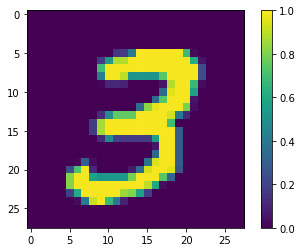

In [21]:
plt.figure()
plt.imshow(x_train[7])
plt.colorbar()
plt.grid(False)
plt.show()

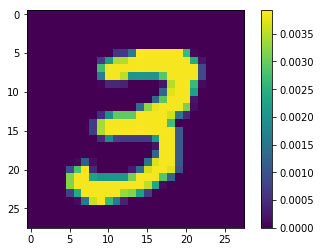

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.figure()
plt.imshow(x_train[7])
plt.colorbar()
plt.grid(False)
plt.show()

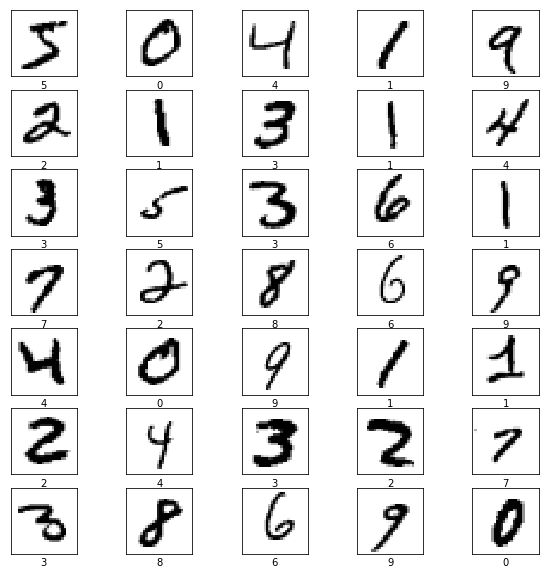

In [23]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

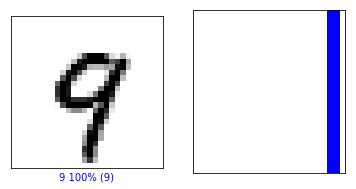

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

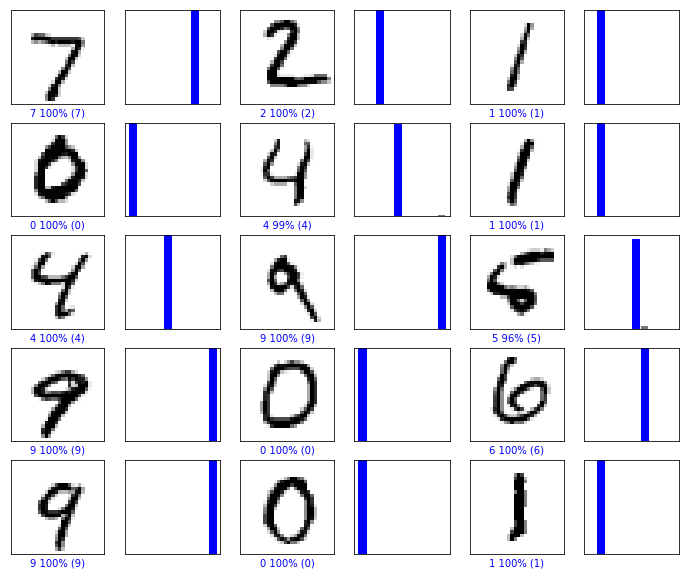

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()